# Debug LF dataset

In [1]:
import xarray as xr
import fsspec
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import kaooi
from tqdm import tqdm
import os

In [2]:
ds = kaooi.open_ooi_lf(compute=True, verbose=True)

mapping dataset to /datadrive/kauai/transmissions/ooi_lf/


100%|██████████| 415/415 [00:05<00:00, 82.92it/s] 


In [3]:
bad_idxs = []

for k in tqdm(range(410)):
    try:
        ds.isel({'transmission':k})['AXEC2'].load()
    except:
        bad_idxs.append(k)

100%|██████████| 410/410 [00:01<00:00, 213.21it/s]


In [6]:
fs = fsspec.filesystem('')
fns = fs.glob('/datadrive/kauai/transmissions/ooi_lf/*.nc')

In [58]:
def ds_dtype(ds):
    '''
    checks if any DataArray in the Dataset has a dtype of float64
    '''
    dtypes = []
    for node in ds:
        dtypes.append(ds[node].dtype)

    if 'float64' in dtypes:
        return True
    else:
        return False

In [10]:
ds = xr.open_dataset(fns[-10])

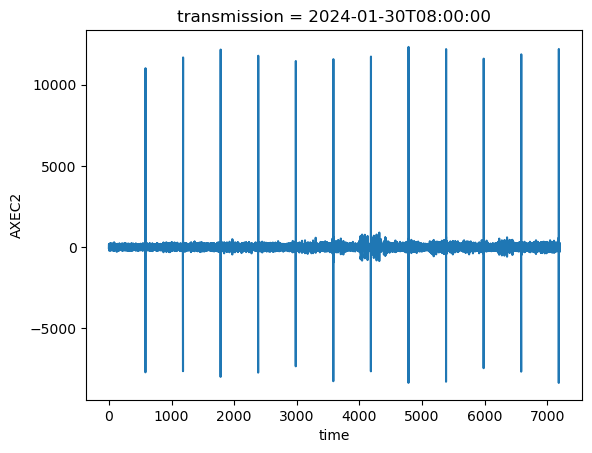

In [11]:
ds['AXEC2'].plot()

In [12]:
x = np.ones(100)*np.nan